In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame()
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.shape

(1338, 7)

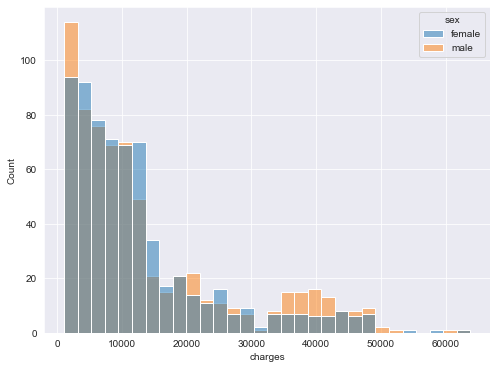

In [5]:
plt.figure(figsize=(8,6));
sns.set_style('darkgrid');
sns.histplot(data=df,x='charges',hue='sex');

For low medical charges, count of males exceeded females. However, female dominated for charges less than 20000. For charges over 20000, male count was higher.

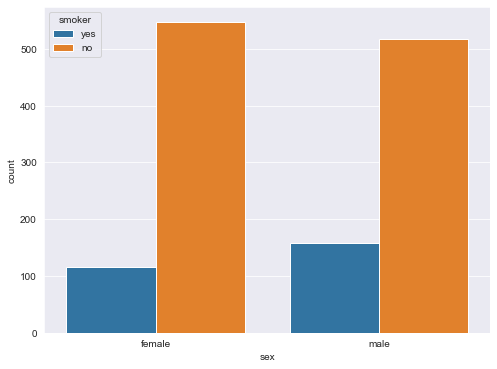

In [6]:
plt.figure(figsize=(8,6));
sns.countplot(data=df,x='sex',hue='smoker');

Majority of Male/Female are non-smoker. Gender ratio is not imbalanced, number of males are slightly higher than number of females.

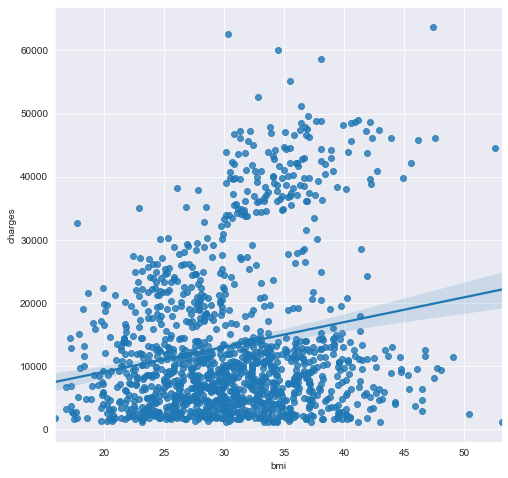

In [7]:
plt.figure(figsize=(8,8));
sns.regplot(data=df,x='bmi',y='charges');

Data points are concentrated for charges less than 10000, few outliers can also be seen from the plot.

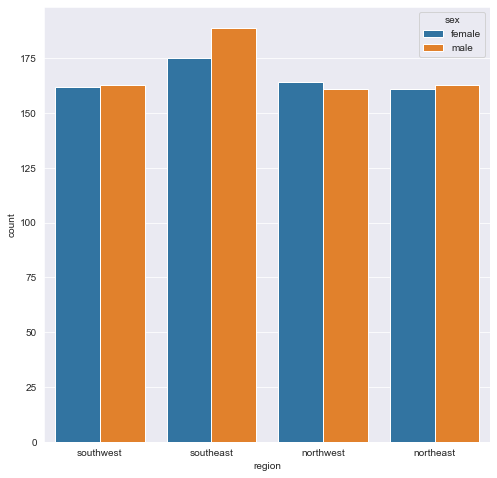

In [8]:
plt.figure(figsize=(8,8));
sns.countplot(data=df,x='region',hue='sex');

Gender Ratio is not imbalanced in any region and even the data as whole is not imbalanced in contrast with region.

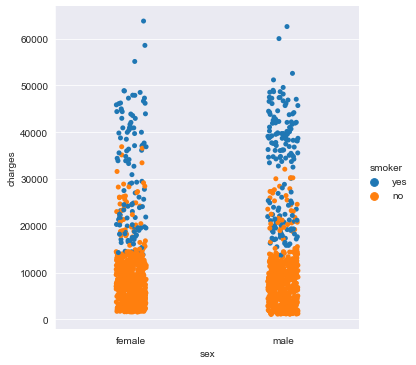

In [9]:
sns.catplot(data=df,x='sex',y='charges',hue='smoker');

Non-smokers have lower charges wheres for higher charges, male count is slightly greater.

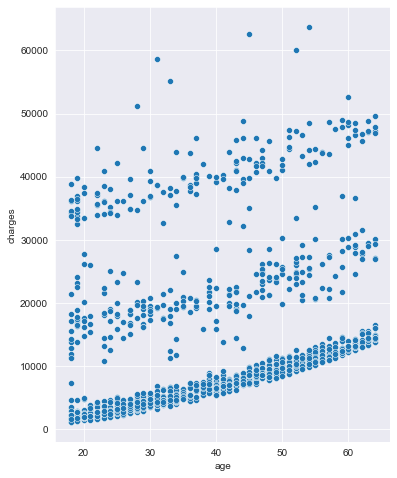

In [10]:
plt.figure(figsize=(6,8));
sns.scatterplot(data=df,x='age',y='charges');

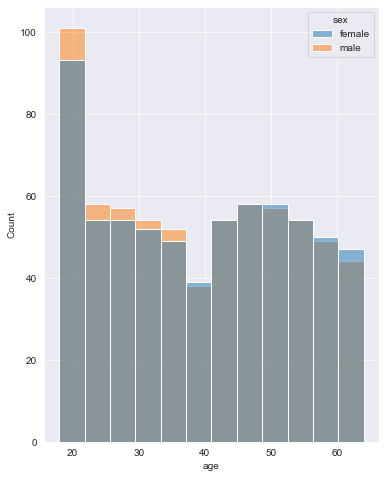

In [11]:
plt.figure(figsize=(6,8));
sns.histplot(data=df,x='age',hue='sex');

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
coder=LabelEncoder()
ohe=OneHotEncoder()

In [13]:
ohc=ohe.fit_transform(df['region'].values.reshape(-1,1)).toarray()

In [14]:
df_region=pd.DataFrame(ohc,columns=['Region' + str(ohe.categories_[0][i]) for i in range(len(ohe.categories_[0]))])
df=pd.concat([df_region,df],axis=1)

In [15]:
df.drop(['region','Regionsouthwest'],axis=1,inplace=True)
df.head()

,Regionnortheast,Regionnorthwest,Regionsoutheast,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,19,female,27.900,0,yes,16884.92400
1,0.0,0.0,1.0,18,male,33.770,1,no,1725.55230
2,0.0,0.0,1.0,28,male,33.000,3,no,4449.46200
3,0.0,1.0,0.0,33,male,22.705,0,no,21984.47061
4,0.0,1.0,0.0,32,male,28.880,0,no,3866.85520


In [16]:
df['sex']=coder.fit_transform(df['sex'])
df['smoker']=coder.fit_transform(df['smoker'])

In [17]:
df.head()

,Regionnortheast,Regionnorthwest,Regionsoutheast,age,sex,bmi,children,smoker,charges
0,0.0,0.0,0.0,19,0,27.900,0,1,16884.92400
1,0.0,0.0,1.0,18,1,33.770,1,0,1725.55230
2,0.0,0.0,1.0,28,1,33.000,3,0,4449.46200
3,0.0,1.0,0.0,33,1,22.705,0,0,21984.47061
4,0.0,1.0,0.0,32,1,28.880,0,0,3866.85520


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

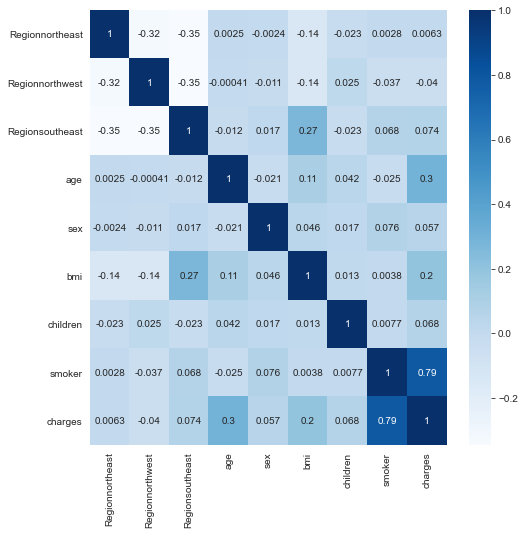

In [19]:
plt.figure(figsize=(8,8));
sns.heatmap(df.corr(),annot=True,cmap='Blues');

Smoker feature has a high correlation with Charges. Let's try LR only with one feature.

In [20]:
X=np.array(df['smoker'].copy()).reshape(-1,1)
y=df['charges'].copy()

In [21]:
LR=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
LR.fit(X_train,y_train)

LinearRegression()

In [22]:
print('Coefficients:',LR.coef_.round(3))
print('Intercept:',LR.intercept_.round(3))

Coefficients: [23188.686]
Intercept: 8578.323


In [23]:
pred=LR.predict(X_test)
print('R^2 for Testing Data:',r2_score(y_test,pred).round(3))
print('R^2 for Total Data:',r2_score(y,LR.predict(X)).round(3))

R^2 for Testing Data: 0.66
R^2 for Total Data: 0.62


In [24]:
print('MSE for testing data:',mean_squared_error(y_test,pred).round(3))
print('MSE for training data:',mean_squared_error(y_train,LR.predict(X_train)).round(3))

MSE for testing data: 52745964.728
MSE for training data: 56506970.26


Let's add bmi and age as features.

In [25]:
X=df[['smoker','bmi','age']].copy()
y=df['charges'].copy()

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
LR.fit(X_train,y_train)
print('Coefficients:',LR.coef_.round(3))
print('Intercept:',LR.intercept_.round(3))

Coefficients: [23675.372   326.45    259.41 ]
Intercept: -11707.802


In [27]:
pred=LR.predict(X_test)
print('R^2 for Testing Data:',r2_score(y_test,pred).round(3))
print('R^2 for Total Data:',r2_score(y,LR.predict(X)).round(3))

R^2 for Testing Data: 0.778
R^2 for Total Data: 0.747


In [28]:
print('MSE for testing data:',mean_squared_error(y_test,pred).round(3))
print('MSE for training data:',mean_squared_error(y_train,LR.predict(X_train)).round(3))

MSE for testing data: 34512843.88
MSE for training data: 37638069.17


Scored improved significantly, now let's take all the features.

In [29]:
X=df.drop('charges',axis=1).copy()
y=df['charges'].copy()

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
LR.fit(X_train,y_train)
print('Coefficients:',LR.coef_.round(3))
print('Intercept:',LR.intercept_.round(3))

Coefficients: [ 8.0979900e+02  4.3912200e+02  1.5193500e+02  2.5697600e+02
 -1.8592000e+01  3.3709300e+02  4.2527900e+02  2.3651129e+04]
Intercept: -12741.018


In [31]:
pred=LR.predict(X_test)
print('R^2 for Testing Data:',r2_score(y_test,pred).round(3))
print('R^2 for Total Data:',r2_score(y,LR.predict(X)).round(3))

R^2 for Testing Data: 0.784
R^2 for Total Data: 0.751


In [32]:
print('MSE for testing data:',mean_squared_error(y_test,pred).round(3))
print('MSE for training data:',mean_squared_error(y_train,LR.predict(X_train)).round(3))

MSE for testing data: 33596915.851
MSE for training data: 37277681.702


Score slightly improved, although MSE is very large. Scaling the data might reduce MSE.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
charges=scaler.fit_transform(df['charges'].values.reshape(-1,1))

In [35]:
X=df.drop('charges',axis=1).copy()
y=charges.copy()

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
LR.fit(X_train,y_train)
print('Coefficients:',LR.coef_.round(3))
print('Intercept:',LR.intercept_.round(3))

Coefficients: [[ 0.067  0.036  0.013  0.021 -0.002  0.028  0.035  1.954]]
Intercept: [-2.149]


In [37]:
pred=LR.predict(X_test)
print('R^2 for Testing Data:',r2_score(y_test,pred).round(3))
print('R^2 for Total Data:',r2_score(y,LR.predict(X)).round(3))

R^2 for Testing Data: 0.784
R^2 for Total Data: 0.751


In [38]:
print('MSE for testing data:',mean_squared_error(y_test,pred).round(3))
print('MSE for training data:',mean_squared_error(y_train,LR.predict(X_train)).round(3))

MSE for testing data: 0.229
MSE for training data: 0.254


MSE reduced significantly while R^2 remains the same.

In [39]:
import statsmodels.api as sm

In [40]:
X=df.drop('charges',axis=1).copy()
y=df['charges'].copy()
X=sm.add_constant(X)
ols=sm.OLS(y,X)
results=ols.fit()

In [41]:
results.params

const             -12898.589567
Regionnortheast      960.050991
Regionnorthwest      607.087092
Regionsoutheast      -74.971058
age                  256.856353
sex                 -131.314359
bmi                  339.193454
children             475.500545
smoker             23848.534542
dtype: float64

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:16:06   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.29e+04   1020.964    -12.634      0.000   -1.49e+04   -1.09e+04
Regionnortheast   960.0510    477.933      2.009      0.045      22.466    1897.636
Regionnorthwest   607.0871    477.204      1.272      0.204    -329.068    1543.242
Regionsoutheast   -74.9711    470.639     -0.159      0.873    -998.247     848.305
age               256.8564     11.899     21.587      0.000     233.514     280.199
sex              -131.3144    332.945     -0.394      0.693    -784.470     521.842
bmi               339.1935     28.599     11.860      0.000     283.088     395.298
children          475.5005    137.804      3.451      0.001     205.163     745.838
smoker           2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
X=df.drop(['sex','charges','Regionsoutheast','Regionnorthwest'],axis=1).copy()
y=df['charges'].copy()
X=sm.add_constant(X)
ols=sm.OLS(y,X)
results=ols.fit()

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     801.0
Date:                Fri, 18 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:16:07   Log-Likelihood:                -13549.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.251e+04    963.375    -12.988      0.000   -1.44e+04   -1.06e+04
Regionnortheast   773.9462    390.709      1.981      0.048       7.473    1540.419
age               257.4058     11.885     21.657      0.000     234.090     280.722
bmi               329.4629     27.616     11.930      0.000     275.287     383.639
children          479.5142    137.674      3.483      0.001     209.432     749.596
smoker           2.381e+04    410.773     57.959      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      302.023   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              727.655
Skew:                           1.215   Prob(JB):                    9.81e-159
Kurtosis:                       5.674   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""